In [1]:
# import basic modules
import os, sys

# add parent folder of the C_to_U_classifier_plus_min package to path in order to be loaded into the current session
sys.path.append("/lustrehome/afonzino")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from C_to_U_classifier_plus_min import utils
import pysam
from tqdm import tqdm

In [2]:
cc1_residual_freq_thrs = pd.read_table("cc1/cc1.CNN_wavenet_08/cc1.CNN.freq_thresholds.tsv")
cc1_residual_freq_thrs

,5mer,max
0,CCCCA,0.000000
1,CCCAT,0.000000
2,CCCCG,0.000000
3,GCCTG,0.000000
4,ACCCT,0.000000
...,...,...
251,TTCTC,0.080068
252,TTCTT,0.092216
253,AACCG,0.118984
254,AACCA,0.153422


In [3]:
cc2_residual_freq_thrs = pd.read_table("cc2/cc2.CNN_wavenet_08/cc2.CNN.freq_thresholds.tsv")
cc2_residual_freq_thrs

,5mer,max
0,GCCCA,0.000009
1,ACCCA,0.000011
2,CCCCA,0.000014
3,TCCCG,0.000026
4,GCCCT,0.000027
...,...,...
251,CGCGG,0.061459
252,CTCGG,0.062766
253,ATCTC,0.068253
254,AACCG,0.096340


In [4]:
cc_merged_freq_thrs = pd.merge(cc1_residual_freq_thrs, cc2_residual_freq_thrs, on=["5mer"])
cc_merged_freq_thrs.columns = ["5mer", "max_cc1", "max_cc2"]
cc_merged_freq_thrs

,5mer,max_cc1,max_cc2
0,CCCCA,0.000000,0.000014
1,CCCAT,0.000000,0.000461
2,CCCCG,0.000000,0.000251
3,GCCTG,0.000000,0.000127
4,ACCCT,0.000000,0.000209
...,...,...,...
251,TTCTC,0.080068,0.019324
252,TTCTT,0.092216,0.020715
253,AACCG,0.118984,0.096340
254,AACCA,0.153422,0.022536


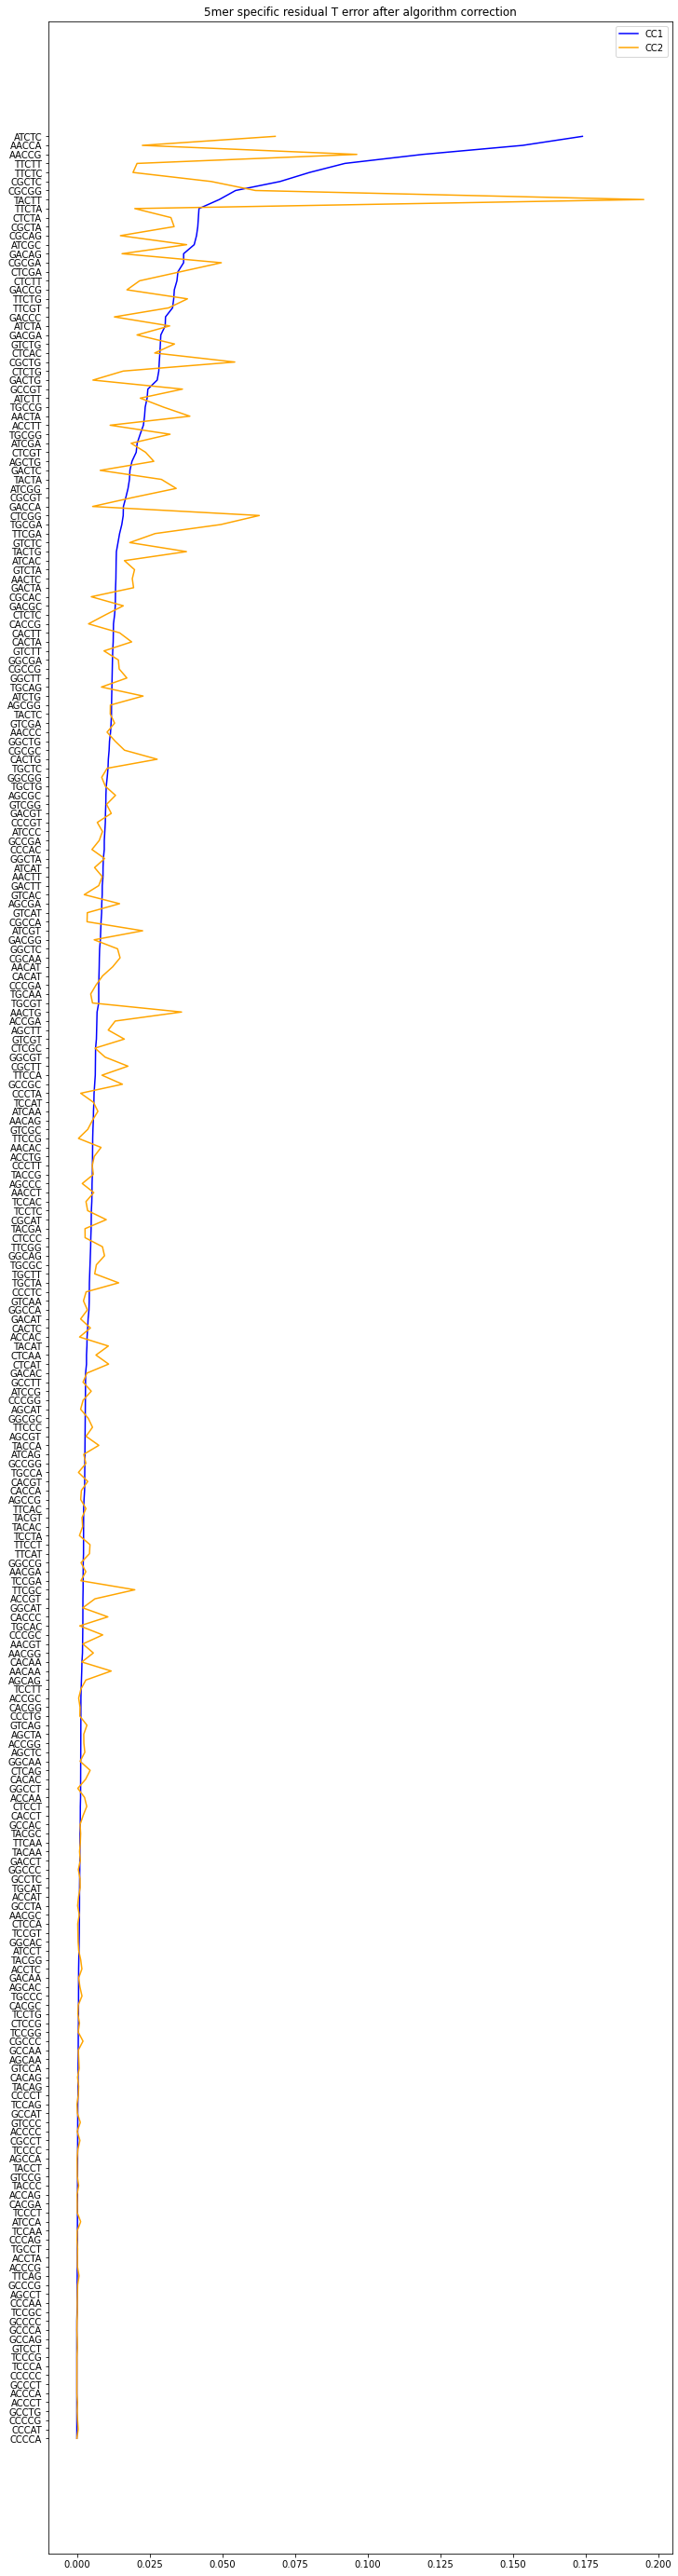

In [5]:
plt.figure(figsize=(12,50))
plt.plot(cc_merged_freq_thrs.max_cc1, cc_merged_freq_thrs["5mer"], color="blue", label="CC1")
plt.plot(cc_merged_freq_thrs.max_cc2,cc_merged_freq_thrs["5mer"], color="orange", label="CC2")
plt.title("5mer specific residual T error after algorithm correction")
plt.legend()
plt.savefig("Max CT freq error before and after CNN correction_cc1_plus_cc2.tiff", dpi=100)
plt.show()

In [6]:
# take maximum value among cc1 and cc2 and save final thresholds table
cc_merged_freq_thrs.set_index("5mer", inplace=True)
cc_merged_freq_thrs

,max_cc1,max_cc2
5mer,,
CCCCA,0.000000,0.000014
CCCAT,0.000000,0.000461
CCCCG,0.000000,0.000251
GCCTG,0.000000,0.000127
ACCCT,0.000000,0.000209
...,...,...
TTCTC,0.080068,0.019324
TTCTT,0.092216,0.020715
AACCG,0.118984,0.096340


In [7]:
cc_merged_freq_thrs_max = cc_merged_freq_thrs.T.describe().T["max"]
cc_merged_freq_thrs_max

5mer
CCCCA    0.000014
CCCAT    0.000461
CCCCG    0.000251
GCCTG    0.000127
ACCCT    0.000209
           ...   
TTCTC    0.080068
TTCTT    0.092216
AACCG    0.118984
AACCA    0.153422
ATCTC    0.173970
Name: max, Length: 256, dtype: float64

In [8]:
cc_merged_freq_thrs_max.to_csv("cc1_cc2_merged.CNN.freq_thresholds.tsv", sep="\t")